## Part 1: Load Dataset & Frame the Problem

We use the Scikit-Learn Diabetes dataset to predict the progression of diabetes one year after baseline. The target variable is a quantitative score indicating disease progression. Our goal is to build regression models that can support early screening by physicians.


In [2]:
from sklearn import datasets
import pandas as pd

# Load diabetes dataset as DataFrame
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target
df = X.copy()
df["target"] = y

# Problem framing
# The objective is to predict "target": a quantitative measure of disease progression after one year.


## Exploratory Data Analysis (EDA)

We explore the dataset to understand distributions and relationships between variables. Key goals:
- Summarize feature statistics
- Visualize target correlations
- Identify relevant features for modeling


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


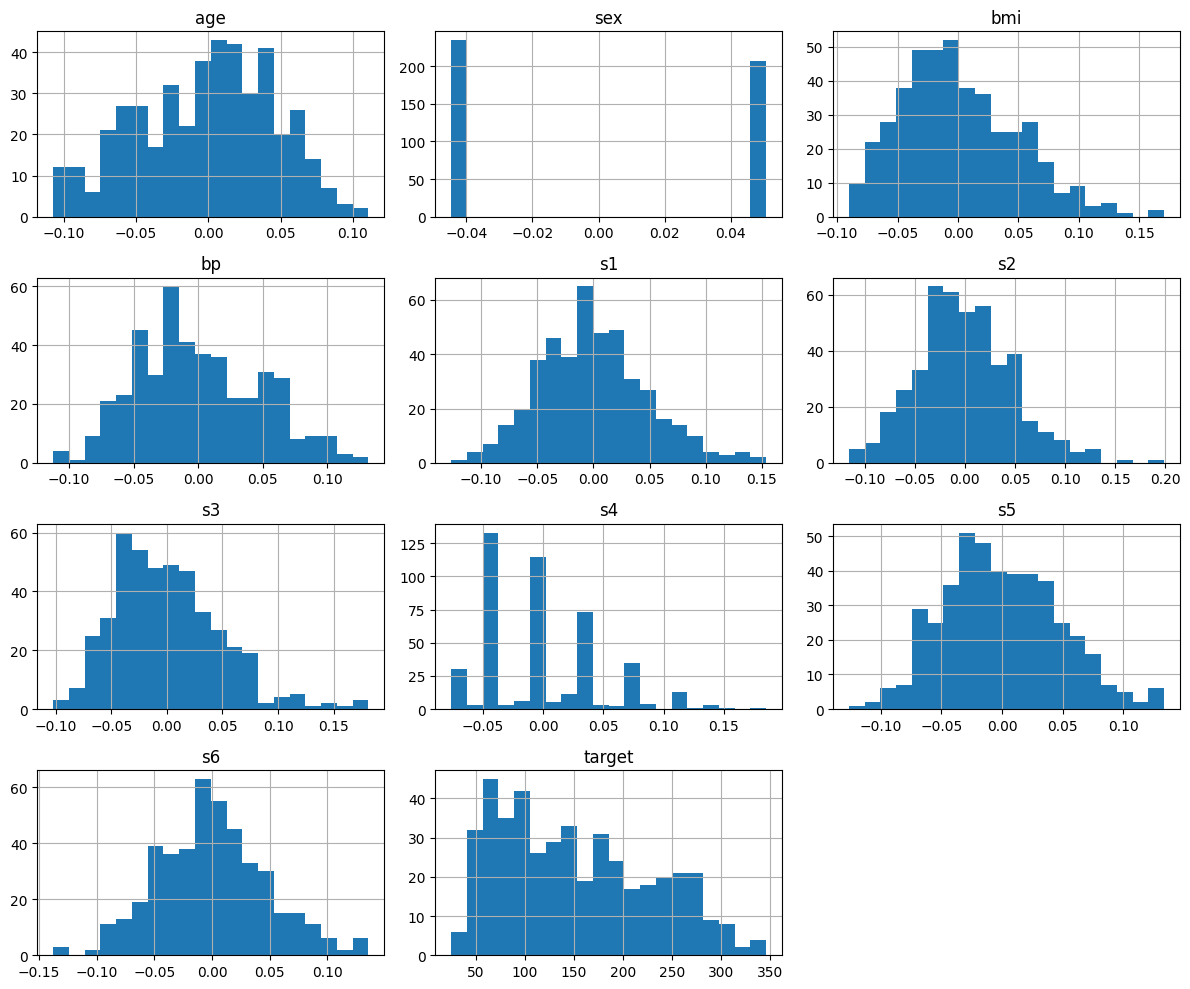

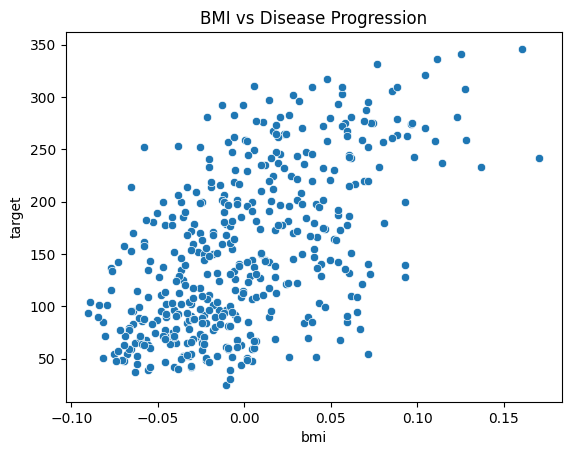

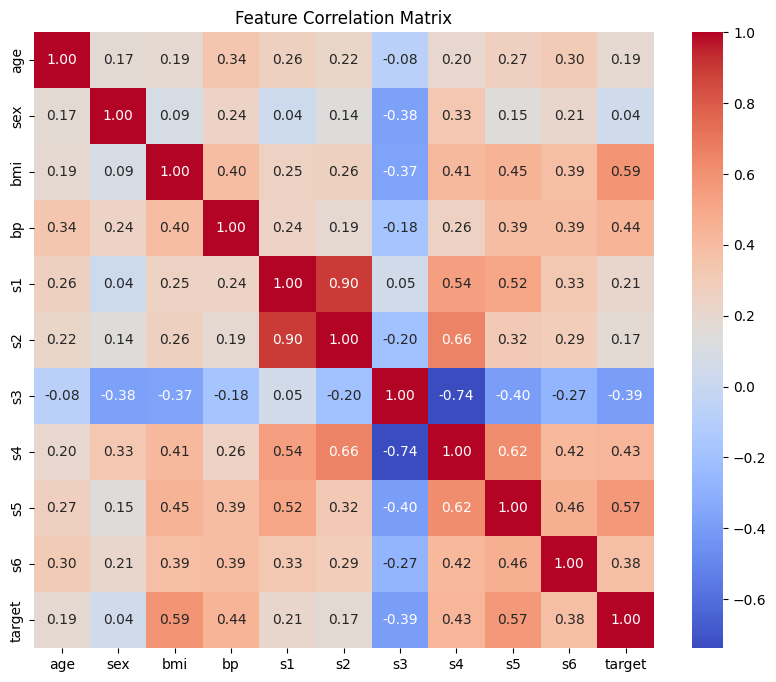

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
display(df.describe())

# Histograms
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Scatter plots: BMI vs target (important for Part 2)
sns.scatterplot(x=df['bmi'], y=df['target'])
plt.title('BMI vs Disease Progression')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Matrix')
plt.show()

### EDA Insights:
- **BMI** shows strong correlation (~0.59) with diabetes progression.
- **S5 (blood serum)** also correlates positively.
- Features are already standardized, so scaling is not required.


## Data Splitting

We split the data into train (75%), validation (10%), and test (15%) sets using `train_test_split`.

In [4]:
from sklearn.model_selection import train_test_split

# Split: 75% train, 10% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1176, random_state=42)  # ~10%

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (330, 10), Val: (45, 10), Test: (67, 10)


## Part 2: Univariate Polynomial Regression (BMI only)

We now apply polynomial regression using only the BMI feature. We fit models with degrees 0 to 5, and compare them using R², MAE, and MAPE on both train and validation sets.

In [5]:
# Polynomial Regression with Scikit-learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# Load dataset
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

# Split into train (75%), validation (10%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1176, random_state=42)  # ~10%

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (330, 10), Val: (45, 10), Test: (67, 10)


In [7]:
#3
results = []

for degree in range(6):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])

    model = LinearRegression().fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    mape = mean_absolute_percentage_error(y_val, y_val_pred)

    results.append([degree, r2_train, r2_val, mae, mape])

results_df = pd.DataFrame(results, columns=["Degree", "R2_Train", "R2_Val", "MAE", "MAPE"])
display(results_df)


,Degree,R2_Train,R2_Val,MAE,MAPE
0,0,0.000000,-0.000011,63.447475,0.587933
1,1,0.354240,0.449292,41.997581,0.404450
2,2,0.354771,0.449158,41.757683,0.403099
3,3,0.355002,0.447291,41.741042,0.402590
4,4,0.357983,0.449064,41.952846,0.402406
5,5,0.358910,0.453513,42.083400,0.403405


## Best Model Evaluation & Visualization

We select the best polynomial degree based on validation R² score, evaluate it on the test set, and visualize the fitted curve.


In [8]:
#4
best_deg = results_df.sort_values('R2_Val', ascending=False).iloc[0]['Degree']
poly = PolynomialFeatures(int(best_deg))
X_train_poly = poly.fit_transform(X_train[['bmi']])
X_val_poly = poly.transform(X_val[['bmi']])
X_test_poly = poly.transform(X_test[['bmi']])

model = LinearRegression().fit(X_train_poly, y_train)
y_test_pred = model.predict(X_test_poly)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Best degree: {best_deg}, R2: {r2_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}")


Best degree: 5.0, R2: 0.20, MAE: 54.55, MAPE: 0.48


C:\Users\shaar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


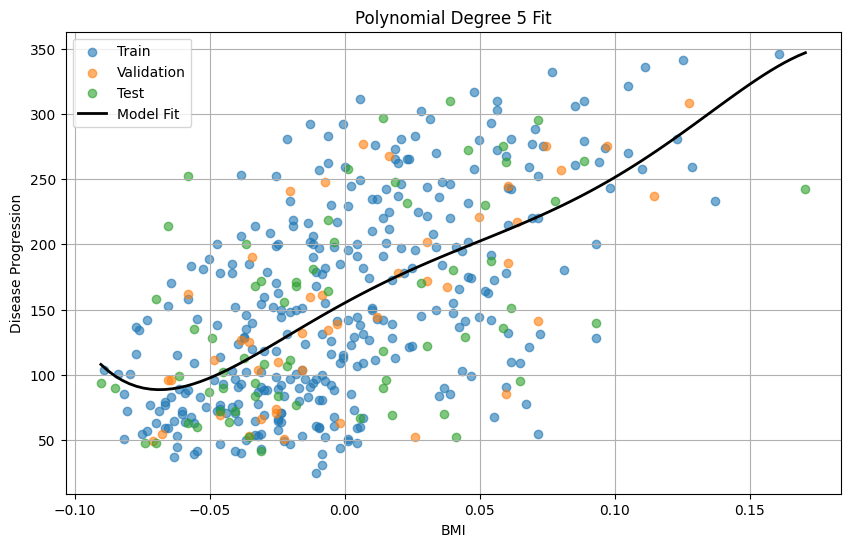

In [9]:
#5
bmi_range = np.linspace(X['bmi'].min(), X['bmi'].max(), 100).reshape(-1, 1)
bmi_range_poly = poly.transform(bmi_range)
predicted_curve = model.predict(bmi_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_train['bmi'], y_train, label='Train', alpha=0.6)
plt.scatter(X_val['bmi'], y_val, label='Validation', alpha=0.6)
plt.scatter(X_test['bmi'], y_test, label='Test', alpha=0.6)
plt.plot(bmi_range, predicted_curve, label='Model Fit', linewidth=2, color='black')
plt.title(f'Polynomial Degree {int(best_deg)} Fit')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()


## Model Equation

We extract and display the mathematical equation of the fitted polynomial model.

In [10]:
#6
coefs = model.coef_
intercept = model.intercept_

equation = f"y = {intercept:.2f} "
for i, c in enumerate(coefs[1:], start=1):
    equation += f"+ {c:.2f} * x^{i} "

print("Model Equation:")
print(equation)


Model Equation:
y = 155.08 + 1131.59 * x^1 + -3946.02 * x^2 + -26110.86 * x^3 + 768725.87 * x^4 + -2823251.97 * x^5 


In [11]:
#7
bmi_value = 0.05  # change as needed
bmi_input = poly.transform([[bmi_value]])
predicted_progression = model.predict(bmi_input)[0]

print(f"Predicted disease progression for BMI={bmi_value}: {predicted_progression:.2f}")


Predicted disease progression for BMI=0.05: 202.46


C:\Users\shaar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Trainable Parameters

For a 5th-degree polynomial model on one feature (BMI), we have 6 trainable parameters (including the intercept). These were generated using `get_feature_names_out(['bmi'])`.

In [12]:
#8
feature_names = poly.get_feature_names_out(['bmi'])
print("Polynomial Features:", feature_names)
print("Number of Trainable Parameters:", len(feature_names))  # includes intercept


Polynomial Features: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']
Number of Trainable Parameters: 6


## Conclusion & Model Evaluation

We developed multiple models to predict diabetes progression using the Scikit-Learn dataset. The best-performing univariate model was a **5th-degree polynomial regression on BMI**.

### Key Results:
- **Test R²**: 0.20
- **MAE**: 54.55
- **MAPE**: 48%

### Observations:
- BMI alone shows a strong correlation with disease progression, but higher-degree models (like degree 5) risk overfitting.
- Errors remain relatively high, suggesting that additional features and more complex models could improve accuracy.

### Limitations:
- Small dataset (442 records) may limit model generalization.
- Using only BMI restricts the model's predictive power.
- Polynomial models can become unstable with higher degrees.

In conclusion, while the polynomial model provides some predictive capability, expanding to multivariate and more robust models would better support clinical decision-making.


## Part 3: Multivariate Models

In [13]:
# Reuse X_train, X_val, X_test from Part 1

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    return {
        "Model": name,
        "R2": r2_score(y_val, y_val_pred),
        "MAE": mean_absolute_error(y_val, y_val_pred),
        "MAPE": mean_absolute_percentage_error(y_val, y_val_pred)
    }

from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

multi_results = []

# Polynomial degree 2, 3
for d in [2, 3]:
    poly_model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    multi_results.append(evaluate_model(poly_model, f"Poly d={d}"))

# Decision Trees
for depth in [2, 5]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    multi_results.append(evaluate_model(tree, f"Tree depth={depth}"))

# kNNs
for k in [3, 7]:
    knn = KNeighborsRegressor(n_neighbors=k)
    multi_results.append(evaluate_model(knn, f"kNN k={k}"))

multi_results_df = pd.DataFrame(multi_results)
from IPython.display import display
display(multi_results_df)


,Model,R2,MAE,MAPE
0,Poly d=2,0.602991,37.745257,0.410976
1,Poly d=3,-115.944928,287.181141,1.932149
2,Tree depth=2,0.461533,41.216410,0.396515
3,Tree depth=5,0.162955,51.550795,0.517688
4,kNN k=3,0.347063,50.770370,0.494523
5,kNN k=7,0.429985,45.850794,0.459080
